# Changing Weather Extremes
By Ibukunfoluwa (Folu) Aderibigbe
100791511

## 1. Introduction
In recent years, the world has seen a significant change in climate trends, as seen through an increase in more extreme weather events. This shift offers a challenge to our understanding of climate systems and how we deal with them. The examination of meteorological data provides the knowledge of the complexity of these shifts. This study seeks to give an in-depth examination of the weather extremes by evaluating meteorological data from 1998 to 2022, with a focus on a specific region (Ontario Tech University). Through discovering these trends, anomalies, and patterns, this study would describe the current state of our climate through this method.

The meteorological variables included in this study are temperature, cloud type, dew point, relative humidity, precipitable water, wind speed, and ultraviolet (UV) irradiation. These variables provide the general behaviour of weather systems. This study intends to capture the short-term fluctuations by evaluating these data over a five-year period.

One of the most important components of this research is the classification of data into four seasons: spring, summer, fall, and winter. This seasonal method enables a more sophisticated understanding of how weather patterns change throughout the year and how these changes correspond to larger climatic changes. It also gives a framework for evaluating data over time, allowing for an assessment of whether specific weather occurrences are growing more or less prominent.





## 2. Analysis

### 1. Imports

The imported data contains data consisting of meteorological information from 2018 till 2022

In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [30]:
def read_csv_files(start_year, end_year, base_path):

    dfs = {}
    for year in range(start_year, end_year + 1):
        file_path = base_path.format(year)
        dfs[year] = pd.read_csv(file_path, skiprows=1, header=1)
    
    return dfs

In [69]:
# load data
dfs = read_csv_files(1998, 2022, 'Files/1090434_43.93_-78.90_{}.csv')

### 2. Codes and Data Manipulation

In [70]:
dfs[1998]

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,...,GHI,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed,Global Horizontal UV Irradiance (280-400nm),Global Horizontal UV Irradiance (295-385nm)
0,1998,1,1,0,30,-13.4,0,0,0,1,...,0,78.62,118.28,0.8,1003,0.2,320,3.8,0.0000,0.0000
1,1998,1,1,1,30,-13.4,0,0,0,1,...,0,79.20,129.06,0.8,1004,0.2,320,3.4,0.0000,0.0000
2,1998,1,1,2,30,-13.2,0,0,0,1,...,0,79.22,139.65,0.8,1005,0.2,318,3.0,0.0000,0.0000
3,1998,1,1,3,30,-13.0,0,0,0,1,...,0,79.29,149.39,0.8,1005,0.2,312,2.6,0.0000,0.0000
4,1998,1,1,4,30,-12.6,0,0,0,4,...,0,78.38,156.79,0.8,1005,0.2,302,2.3,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1998,12,31,19,30,-6.5,69,762,287,8,...,159,74.75,73.39,0.8,992,0.4,250,6.1,7.8893,6.0797
8756,1998,12,31,20,30,-6.7,50,613,157,7,...,102,77.00,79.94,0.8,992,0.4,251,5.9,4.8631,3.7062
8757,1998,12,31,21,30,-6.9,17,236,26,7,...,12,78.40,87.92,0.8,992,0.4,253,5.8,0.0000,0.0000
8758,1998,12,31,22,30,-7.0,0,0,0,7,...,0,78.65,97.58,0.8,992,0.4,256,6.0,0.0000,0.0000


In [71]:
def group_seasons(df):

    seasons = {
        1: 'Winter', 2: 'Winter', 3: 'Spring',
        4: 'Spring', 5: 'Spring', 6: 'Summer',
        7: 'Summer', 8: 'Summer', 9: 'Autumn',
        10: 'Autumn', 11: 'Autumn', 12: 'Winter'
    }

    # Create a column that groups the months displayed as seasons 
    df['Season'] = df['Month'].map(seasons)

    # removes the month, day, hour, minute column and replaces it with the seasons column
    df.drop(['Month', 'Day', 'Hour', 'Minute'], axis=1, inplace=True)

    df = df[['Season'] + [col for col in df.columns if col != 'Season']]

    return df


In [72]:
def calculate_mean(df):
    agg_df = df.groupby('Season').agg({'Year': ['max'], 'Temperature': ['mean', 'min', 'max'],
                                           'Cloud Type': ['mean', 'min', 'max'],
                                           'Dew Point': ['mean', 'min', 'max'],
                                           'Relative Humidity': ['mean', 'min', 'max'],
                                           'Precipitable Water': ['mean', 'min', 'max'],
                                           'Wind Speed': ['mean', 'min', 'max'],
                                           'Global Horizontal UV Irradiance (280-400nm)': ['mean', 'min', 'max'],
                                           'Global Horizontal UV Irradiance (295-385nm)': ['mean', 'min', 'max']
                                          }).reset_index()
    
    agg_df.columns = ['_'.join(col).strip() if col[1] else col[0] for col in agg_df.columns.values]

    agg_df.rename(columns={
        'Year_max': 'Year',
        'Temperature_mean': 'Temperature_Mean', 'Temperature_min': 'Temperature_Min', 'Temperature_max': 'Temperature_Max',
        'Cloud Type_mean': 'Cloud Type_Mean', 'Cloud Type_min': 'Cloud Type_Min', 'Cloud Type_max': 'Cloud Type_Max',
        'Dew Point_mean': 'Dew Point_Mean', 'Dew Point_min': 'Dew Point_Min', 'Dew Point_max': 'Dew Point_Max',
        'Relative Humidity_mean': 'Relative Humidity_Mean', 'Relative Humidity_min': 'Relative Humidity_Min', 'Relative Humidity_max': 'Relative Humidity_Max',
        'Precipitable Water_mean': 'Precipitable Water_Mean', 'Precipitable Water_min': 'Precipitable Water_Min', 'Precipitable Water_max': 'Precipitable Water_Max',
        'Wind Speed_mean': 'Wind Speed_Mean', 'Wind Speed_min': 'Wind Speed_Min', 'Wind Speed_max': 'Wind Speed_Max',
        'Global Horizontal UV Irradiance (280-400nm)_mean': 'UV Irradiance (280-400nm)_Mean', 
        'Global Horizontal UV Irradiance (280-400nm)_min': 'UV Irradiance (280-400nm)_Min', 
        'Global Horizontal UV Irradiance (280-400nm)_max': 'UV Irradiance (280-400nm)_Max',
        'Global Horizontal UV Irradiance (295-385nm)_mean': 'UV Irradiance (295-385nm)_Mean', 
        'Global Horizontal UV Irradiance (295-385nm)_min': 'UV Irradiance (295-385nm)_Min', 
        'Global Horizontal UV Irradiance (295-385nm)_max': 'UV Irradiance (295-385nm)_Max',
    }, inplace=True)

    return agg_df

In [73]:
for df in dfs.values():
    group_seasons(df)

In [74]:
dfs[1998]

,Year,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,DHI,DNI,Fill Flag,...,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed,Global Horizontal UV Irradiance (280-400nm),Global Horizontal UV Irradiance (295-385nm),Season
0,1998,-13.4,0,0,0,1,-16.3,0,0,0,...,78.62,118.28,0.8,1003,0.2,320,3.8,0.0000,0.0000,Winter
1,1998,-13.4,0,0,0,1,-16.2,0,0,0,...,79.20,129.06,0.8,1004,0.2,320,3.4,0.0000,0.0000,Winter
2,1998,-13.2,0,0,0,1,-16.0,0,0,0,...,79.22,139.65,0.8,1005,0.2,318,3.0,0.0000,0.0000,Winter
3,1998,-13.0,0,0,0,1,-15.8,0,0,0,...,79.29,149.39,0.8,1005,0.2,312,2.6,0.0000,0.0000,Winter
4,1998,-12.6,0,0,0,4,-15.6,0,0,0,...,78.38,156.79,0.8,1005,0.2,302,2.3,0.0000,0.0000,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1998,-6.5,69,762,287,8,-10.2,115,156,0,...,74.75,73.39,0.8,992,0.4,250,6.1,7.8893,6.0797,Winter
8756,1998,-6.7,50,613,157,7,-10.1,61,237,0,...,77.00,79.94,0.8,992,0.4,251,5.9,4.8631,3.7062,Winter
8757,1998,-6.9,17,236,26,7,-10.0,12,0,7,...,78.40,87.92,0.8,992,0.4,253,5.8,0.0000,0.0000,Winter
8758,1998,-7.0,0,0,0,7,-10.1,0,0,0,...,78.65,97.58,0.8,992,0.4,256,6.0,0.0000,0.0000,Winter


In [75]:
dfs[1999]

,Year,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,DHI,DNI,Fill Flag,...,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed,Global Horizontal UV Irradiance (280-400nm),Global Horizontal UV Irradiance (295-385nm),Season
0,1999,-7.5,0,0,0,4,-10.5,0,0,0,...,79.10,118.32,0.8,992,0.3,260,6.1,0.0000,0.0000,Winter
1,1999,-7.9,0,0,0,1,-10.7,0,0,0,...,80.45,129.10,0.8,992,0.3,262,6.2,0.0000,0.0000,Winter
2,1999,-8.0,0,0,0,4,-10.8,0,0,0,...,80.19,139.69,0.8,992,0.3,266,6.4,0.0000,0.0000,Winter
3,1999,-8.0,0,0,0,4,-10.8,0,0,0,...,80.41,149.42,0.8,992,0.3,270,6.7,0.0000,0.0000,Winter
4,1999,-7.9,0,0,0,4,-10.7,0,0,0,...,80.48,156.82,0.8,992,0.3,271,7.1,0.0000,0.0000,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1999,-0.2,82,665,272,8,-3.4,58,0,0,...,78.88,73.42,0.8,996,0.8,224,4.1,2.8771,2.2170,Winter
8756,1999,-0.2,58,511,147,7,-2.7,51,0,0,...,83.35,79.97,0.8,996,0.8,233,4.1,2.4317,1.8532,Winter
8757,1999,-0.3,18,143,23,4,-2.2,7,0,7,...,87.01,87.95,0.8,997,0.7,240,4.1,0.0000,0.0000,Winter
8758,1999,-0.2,0,0,0,4,-1.7,0,0,0,...,89.82,97.61,0.8,997,0.7,248,4.4,0.0000,0.0000,Winter


In [76]:
dfs[2000]

,Year,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,DHI,DNI,Fill Flag,...,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed,Global Horizontal UV Irradiance (280-400nm),Global Horizontal UV Irradiance (295-385nm),Season
0,2000,-0.4,0,0,0,7,-1.4,0,0,0,...,93.05,118.35,0.14,998,0.8,259,4.5,0.0000,0.0000,Winter
1,2000,-0.8,0,0,0,7,-1.7,0,0,0,...,93.69,129.13,0.14,998,0.8,261,4.0,0.0000,0.0000,Winter
2,2000,-1.3,0,0,0,7,-2.1,0,0,0,...,94.63,139.72,0.14,998,0.8,261,3.5,0.0000,0.0000,Winter
3,2000,-1.7,0,0,0,7,-2.4,0,0,0,...,94.64,149.46,0.14,998,0.9,260,2.9,0.0000,0.0000,Winter
4,2000,-2.1,0,0,0,7,-2.8,0,0,0,...,94.74,156.85,0.14,998,0.9,256,2.6,0.0000,0.0000,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2000,-7.4,62,773,284,6,-9.9,103,6,0,...,82.01,73.33,0.80,992,0.7,322,6.1,1.6366,1.2611,Winter
8756,2000,-7.5,45,639,158,6,-10.0,66,79,0,...,82.59,79.88,0.80,993,0.6,320,5.9,2.1457,1.6352,Winter
8757,2000,-7.7,17,270,27,6,-10.0,11,0,7,...,83.56,87.86,0.80,994,0.6,320,5.8,0.0000,0.0000,Winter
8758,2000,-7.7,0,0,0,6,-10.0,0,0,0,...,83.31,97.51,0.80,995,0.6,322,6.0,0.0000,0.0000,Winter


### 3. Tables

#### 1. Overall Statistics

In [77]:
processed_dfs = {key: calculate_mean(df).round(2) for key, df in dfs.items()}

In [78]:
processed_dfs[2018]

,Season,Year,Temperature_Mean,Temperature_Min,Temperature_Max,Cloud Type_Mean,Cloud Type_Min,Cloud Type_Max,Dew Point_Mean,Dew Point_Min,...,Precipitable Water_Max,Wind Speed_Mean,Wind Speed_Min,Wind Speed_Max,UV Irradiance (280-400nm)_Mean,UV Irradiance (280-400nm)_Min,UV Irradiance (280-400nm)_Max,UV Irradiance (295-385nm)_Mean,UV Irradiance (295-385nm)_Min,UV Irradiance (295-385nm)_Max
0,Autumn,2018,10.06,-12.6,32.2,3.52,0,9,6.10,-16.2,...,5.8,3.64,0.1,10.0,5.63,0.0,46.17,4.40,0.0,36.30
1,Spring,2018,5.21,-9.2,27.7,3.29,0,9,1.23,-13.6,...,5.4,3.73,0.2,13.6,11.29,0.0,59.48,8.85,0.0,46.82
2,Summer,2018,21.95,8.4,32.6,2.64,0,9,15.26,2.3,...,6.1,2.80,0.2,8.5,14.63,0.0,62.11,11.48,0.0,48.91
3,Winter,2018,-3.26,-19.5,12.0,4.81,0,9,-5.59,-21.5,...,3.8,4.12,0.5,10.0,3.45,0.0,38.16,2.68,0.0,29.91


2018 seasonal statistics related to various meteorological and environmental factors, including temperature, cloud type, dew point, precipitable water, wind speed, and ultraviolet (UV) irradiance.

In [79]:
processed_dfs[2019]

,Season,Year,Temperature_Mean,Temperature_Min,Temperature_Max,Cloud Type_Mean,Cloud Type_Min,Cloud Type_Max,Dew Point_Mean,Dew Point_Min,...,Precipitable Water_Max,Wind Speed_Mean,Wind Speed_Min,Wind Speed_Max,UV Irradiance (280-400nm)_Mean,UV Irradiance (280-400nm)_Min,UV Irradiance (280-400nm)_Max,UV Irradiance (295-385nm)_Mean,UV Irradiance (295-385nm)_Min,UV Irradiance (295-385nm)_Max
0,Autumn,2019,10.16,-12.0,28.6,3.33,0,9,6.11,-14.6,...,5.7,3.52,0.2,12.9,5.90,0.0,49.44,4.60,0.0,38.87
1,Spring,2019,4.52,-13.8,20.5,3.87,0,9,1.21,-16.3,...,4.7,3.72,0.2,10.0,9.64,0.0,59.89,7.55,0.0,47.15
2,Summer,2019,20.51,4.9,33.0,2.17,0,9,14.30,2.2,...,6.5,2.72,0.1,7.6,15.28,0.0,61.37,11.99,0.0,48.32
3,Winter,2019,-4.58,-22.7,7.2,4.97,0,9,-7.16,-23.0,...,3.1,4.73,0.2,15.2,3.71,0.0,40.79,2.88,0.0,31.97


2019 seasonal statistics related to various meteorological and environmental factors, including temperature, cloud type, dew point, precipitable water, wind speed, and ultraviolet (UV) irradiance.

In [80]:
processed_dfs[2020]

,Season,Year,Temperature_Mean,Temperature_Min,Temperature_Max,Cloud Type_Mean,Cloud Type_Min,Cloud Type_Max,Dew Point_Mean,Dew Point_Min,...,Precipitable Water_Max,Wind Speed_Mean,Wind Speed_Min,Wind Speed_Max,UV Irradiance (280-400nm)_Mean,UV Irradiance (280-400nm)_Min,UV Irradiance (280-400nm)_Max,UV Irradiance (295-385nm)_Mean,UV Irradiance (295-385nm)_Min,UV Irradiance (295-385nm)_Max
0,Autumn,2020,11.19,-4.7,27.5,3.09,0,9,6.47,-9.7,...,4.8,3.61,0.3,12.5,6.39,0.0,50.32,4.99,0.0,39.57
1,Spring,2020,6.04,-10.8,27.6,3.25,0,9,1.57,-11.7,...,4.9,3.81,0.2,11.0,10.43,0.0,61.24,8.17,0.0,48.21
2,Summer,2020,22.74,6.4,33.9,1.73,0,9,15.19,0.0,...,5.9,2.87,0.3,9.2,16.03,0.0,61.98,12.58,0.0,48.80
3,Winter,2020,-2.52,-22.0,8.3,4.79,0,9,-4.96,-22.9,...,3.2,4.26,0.3,12.7,3.53,0.0,36.93,2.74,0.0,28.92


2020 seasonal statistics related to various meteorological and environmental factors, including temperature, cloud type, dew point, precipitable water, wind speed, and ultraviolet (UV) irradiance.

#### 2. Average Seasonal Temperature

1. Autumn table of the Year vs. Average Temperature

In [100]:
def seasonal_grouping(season):
    season_data = []

    for year, df in processed_dfs.items():
        filtered_df = df[df['Season'] == season]

        if not filtered_df.empty:
            data = filtered_df[['Year', 'Temperature_Mean', 'Cloud Type_Mean',
                                'Dew Point_Mean', 'Relative Humidity_Mean',
                                'Precipitable Water_Mean', 'Wind Speed_Mean',
                                'UV Irradiance (280-400nm)_Mean',
                                'UV Irradiance (295-385nm)_Mean']].iloc[0]
            data['Year'] = year
            season_data.append(data)

    if season_data:
        season_table = pd.concat(season_data, axis=1).T
    else:
        season_table = pd.DataFrame()

    season_table = season_table.reset_index(drop=True)

    return season_table

In [101]:
#Autumn
Autumn = seasonal_grouping('Autumn')
Autumn

,Year,Temperature_Mean,Cloud Type_Mean,Dew Point_Mean,Relative Humidity_Mean,Precipitable Water_Mean,Wind Speed_Mean,UV Irradiance (280-400nm)_Mean,UV Irradiance (295-385nm)_Mean
0,1998.0,11.05,3.05,6.51,75.63,1.69,3.45,6.93,5.41
1,1999.0,10.39,3.53,6.02,76.84,1.65,3.48,6.90,5.39
2,2000.0,10.04,3.20,5.91,77.65,1.65,3.35,6.91,5.40
3,2001.0,10.06,3.51,6.48,80.67,1.82,3.38,6.62,5.17
4,2002.0,9.84,3.62,5.48,76.83,1.75,3.35,6.63,5.18
5,2003.0,9.43,3.50,5.91,80.90,1.76,3.43,6.14,4.79
6,2004.0,11.21,3.41,7.09,77.79,1.74,3.38,6.74,5.27
7,2005.0,11.74,3.26,7.50,77.43,1.87,3.77,6.62,5.17
8,2006.0,9.94,3.91,6.90,82.98,1.81,3.36,5.29,4.13
9,2007.0,11.44,3.43,7.25,77.57,1.86,3.36,6.45,5.04


2. Spring table of the Year vs. Average Temperature

In [102]:
#Spring
Spring = seasonal_grouping('Spring')
Spring

,Year,Temperature_Mean,Cloud Type_Mean,Dew Point_Mean,Relative Humidity_Mean,Precipitable Water_Mean,Wind Speed_Mean,UV Irradiance (280-400nm)_Mean,UV Irradiance (295-385nm)_Mean
0,1998.0,7.92,3.46,3.31,75.38,1.48,3.50,12.13,9.51
1,1999.0,6.10,2.69,1.31,73.94,1.20,3.57,13.31,10.43
2,2000.0,6.71,3.73,3.23,79.92,1.50,3.63,10.75,8.43
3,2001.0,5.52,3.39,1.88,79.43,1.30,3.42,12.28,9.63
4,2002.0,4.28,3.83,1.11,81.03,1.31,3.90,11.12,8.71
5,2003.0,3.79,3.84,0.72,81.73,1.41,3.44,10.90,8.55
6,2004.0,5.96,3.89,3.29,84.00,1.59,3.64,9.97,7.82
7,2005.0,5.14,3.19,1.19,77.44,1.17,3.32,11.87,9.31
8,2006.0,6.47,3.04,2.62,78.09,1.32,3.57,11.64,9.12
9,2007.0,5.56,3.51,1.78,78.49,1.35,3.58,11.06,8.67


3. Summer table of the Year vs. Average Temperature

In [103]:
#Summer
Summer = seasonal_grouping('Summer')
Summer

,Year,Temperature_Mean,Cloud Type_Mean,Dew Point_Mean,Relative Humidity_Mean,Precipitable Water_Mean,Wind Speed_Mean,UV Irradiance (280-400nm)_Mean,UV Irradiance (295-385nm)_Mean
0,1998.0,20.88,2.69,14.29,68.67,2.75,2.76,14.96,11.74
1,1999.0,20.59,2.52,13.48,66.72,2.74,2.85,15.58,12.22
2,2000.0,18.95,3.05,14.42,77.12,2.72,2.80,14.41,11.30
3,2001.0,19.57,2.73,13.24,69.66,2.68,2.78,15.43,12.11
4,2002.0,20.09,2.47,14.34,72.42,2.80,2.66,15.95,12.52
5,2003.0,19.18,2.94,13.53,72.58,2.73,2.77,14.55,11.42
6,2004.0,18.57,3.24,14.29,77.88,2.76,2.71,13.71,10.76
7,2005.0,23.02,2.89,15.63,66.16,3.04,2.73,14.80,11.62
8,2006.0,21.31,2.98,14.82,69.10,2.83,2.88,14.66,11.50
9,2007.0,20.80,2.66,13.84,66.95,2.72,2.76,14.97,11.74


4. Winter table of the Yearly Average Temperature

In [104]:
#Winter
Winter = seasonal_grouping('Winter')
Winter

,Year,Temperature_Mean,Cloud Type_Mean,Dew Point_Mean,Relative Humidity_Mean,Precipitable Water_Mean,Wind Speed_Mean,UV Irradiance (280-400nm)_Mean,UV Irradiance (295-385nm)_Mean
0,1998.0,-1.79,4.21,-4.22,84.07,0.97,4.13,3.70,2.88
1,1999.0,-3.65,4.14,-6.13,83.43,0.81,4.33,3.88,3.01
2,2000.0,-5.11,4.46,-7.65,82.67,0.73,4.72,3.94,3.06
3,2001.0,-3.33,4.27,-5.28,86.64,0.84,3.95,3.43,2.67
4,2002.0,-2.71,4.49,-4.90,85.19,0.85,4.55,3.60,2.80
5,2003.0,-6.43,4.45,-8.67,84.40,0.68,4.30,3.94,3.06
6,2004.0,-6.11,4.67,-8.05,86.42,0.70,4.59,3.32,2.58
7,2005.0,-4.74,4.64,-7.10,83.87,0.77,4.05,3.46,2.69
8,2006.0,-1.73,4.49,-3.72,86.49,0.93,4.49,3.28,2.55
9,2007.0,-4.94,4.55,-6.98,85.81,0.75,4.67,3.16,2.46


### 4. Graphs

1. Autumn line graph of the Yearly Average Temperature

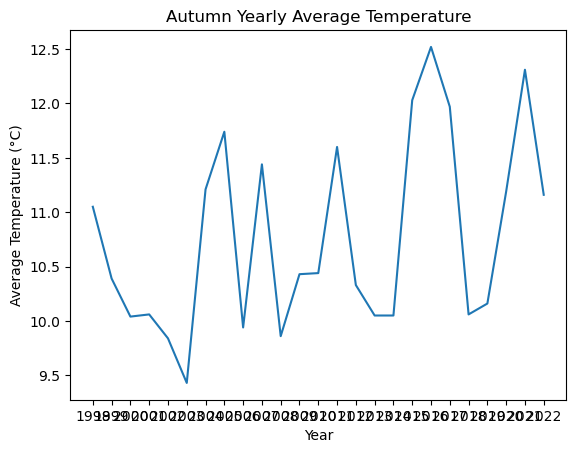

In [105]:
x = Autumn['Year']
y = Autumn['Temperature_Mean']

plt.plot(x, y, label='Scatter Plot')

plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.title('Autumn Yearly Average Temperature')

plt.xticks(x)
plt.show()


2. Spring line graph of the Yearly Average Temperature

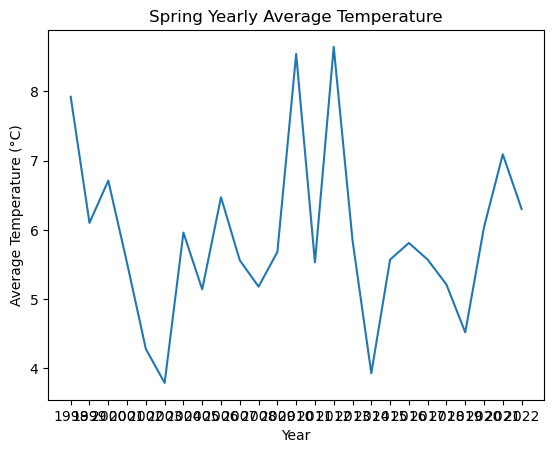

In [87]:
x = Spring['Year']
y = Spring['Temperature_Mean']

plt.plot(x, y, label='Scatter Plot')

plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.title('Spring Yearly Average Temperature')

plt.xticks(x)
plt.show()

3. Summer line graph of the Yearly Average Temperature

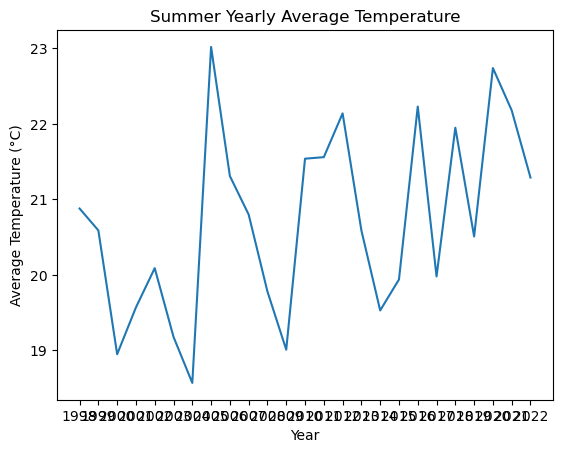

In [90]:
x = Summer['Year']
y = Summer['Temperature_Mean']

plt.plot(x, y, label='Scatter Plot')

plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.title('Summer Yearly Average Temperature')

plt.xticks(x)
plt.show()

4. Winter line graph of the Yearly Average Temperature

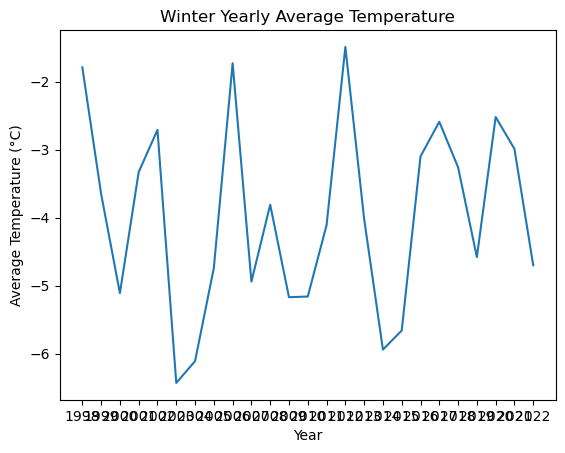

In [91]:
x = Winter['Year']
y = Winter['Temperature_Mean']

plt.plot(x, y, label='Scatter Plot')

plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.title('Winter Yearly Average Temperature')

plt.xticks(x)
plt.show()

## 3. Discussion

#### Autumn Temperature Trends:
Autumn temperatures rise sharply in 2021, possibly due to a specific abnormal event altering the region's climate that year. This could imply that extreme temperature episodes are becoming more pronounced or frequent, which is consistent with climate change models forecasting more extreme weather.

#### Spring Temperature Trends:
The average spring temperature is rising, with the greatest average temperature in 2021. This rise could be linked to a broader warming trend, which is consistent with global data of rising temperatures. If this trend continues, it could support forecasts of global warming leading to earlier springs.

#### Summer Temperature Trends:
Summer average temperatures reflect a changing pattern, peaking in 2020 and then dropping. This could imply that, while average temperatures increased significantly in the summer of 2020, probably due to an exceptional weather event, future years hoiwever saw a relative cooling.

#### Winter Temperature Trends:
Winter data show a general drop in average temperatures over the last five years. This declining tendency may indicate that winters are getting colder. However, the appearance of this pattern over such a short period does not invalidate global warming theories as climate change can lead to higher variability and resulting in disruptions in weather patterns, can manifest as more frequent and intense cold spells.

## Deep Learning Model

### 1. Import Dependecies

In [107]:
X = Autumn.drop(['Temperature_Mean', 'Year'], axis=1)
y = Autumn['Temperature_Mean']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [114]:
y_train

11    10.43
19    11.97
4      9.84
1     10.39
6     11.21
17    12.03
7     11.74
23    12.31
8      9.94
18    12.52
24    11.16
14    10.33
22    11.19
21    10.16
0     11.05
15    10.05
12    10.44
20    10.06
13    11.60
10     9.86
Name: Temperature_Mean, dtype: float64

### 2. Build and Compilation

In [110]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [115]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=32, activation='relu', input_dim=7))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units= 1, activation='linear'))

In [116]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [117]:
model.fit(X_train, y_train, epochs=1000, batch_size=32)


Epoch 1/1000
1/1 [==============================] - 0s 262ms/step - loss: 68.7749 - mae: 8.2453
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 41.5017 - mae: 6.3786
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 21.7431 - mae: 4.5709
Epoch 4/1000
1/1 [==============================] - 0s 1ms/step - loss: 8.9547 - mae: 2.8468
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.6400 - mae: 1.3411
Epoch 6/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.9771 - mae: 0.8724
Epoch 7/1000
1/1 [==============================] - 0s 3ms/step - loss: 2.2210 - mae: 1.2403
Epoch 8/1000
1/1 [==============================] - 0s 2ms/step - loss: 4.9419 - mae: 1.9718
Epoch 9/1000
1/1 [==============================] - 0s 1ms/step - loss: 7.8349 - mae: 2.6004
Epoch 10/1000
1/1 [==============================] - 0s 2ms/step - loss: 9.9650 - mae: 2.9804
Epoch 11/1000
1/1 [==============================] - 0s 2ms/step

### 3. Predict and Evaluate

In [120]:
scaler = StandardScaler()
new_data_scaled = scaler.fit_transform(Autumn.drop(['Temperature_Mean', 'Year'], axis=1))

predicted_temperatures = model.predict(new_data_scaled)

1/1 [==============================] - 0s 28ms/step


In [131]:
target_scaler = StandardScaler()
target_scaler.fit(Summer[['Precipitable Water_Mean']])


predicted_temperatures_original_scale = target_scaler.inverse_transform(predicted_temperatures)

# Display the re-scaled predictions
print(predicted_temperatures_original_scale)


[[2.9594212]
 [2.8404958]
 [2.9119034]
 [2.9128308]
 [2.8199215]
 [2.8250034]
 [2.938283 ]
 [3.0485997]
 [2.7596273]
 [2.9362268]
 [2.8825998]
 [2.8705454]
 [2.8315234]
 [2.9315   ]
 [2.8581333]
 [2.8713596]
 [2.8362772]
 [3.064267 ]
 [3.0815632]
 [2.9029827]
 [2.7921832]
 [2.8432667]
 [2.9139316]
 [2.999625 ]
 [2.8769186]]


### Conclusion
The results of the study raise serious concerns about the local consequences of larger climatic trends. While the specific seasonal trends do not explicitly indicate global warming, the observed fluctuations and extreme temperature events are consistent with the projected outcomes of a warming globe. This study requires ongoing monitoring and research to fully understand the influence of climate change on regional weather patterns.


## 4. References
[NSRDB. (n.d.).](https://nsrdb.nrel.gov/)